In [60]:
import pandas as pd
import numpy as np
import xlrd
import xlwt
import matplotlib

In [203]:
from pyecharts import Bar, Line
from pyecharts.engine import create_default_environment

In [460]:
NFLIS = pd.read_excel(io = 'MCM_NFLIS_Data.xlsx',sheet_name='Data')
Drug_Class = pd.read_csv('Drug_Class_dict.csv',header=None)

In [462]:
Drug_Class.columns = ['Drug', 'class']

In [463]:
Drug_Class

,Drug,class
0,3-Fluorofentanyl,sythetic_opioid
1,3-Methylfentanyl,sythetic_opioid
2,4-Fluoroisobutyryl fentanyl,sythetic_opioid
3,4-Methylfentanyl,sythetic_opioid
4,Acetyl fentanyl,sythetic_opioid
5,Acetylcodeine,other
6,Acetyldihydrocodeine,other
7,Acryl fentanyl,sythetic_opioid
8,Alphaprodine,other
9,ANPP,other


# 建立Drug_Class Dict

In [513]:
Drug_class_dict = {}
for i in range(0, Drug_Class.shape[0]):
    Drug_class_dict[Drug_Class['Drug'][i]] = Drug_Class['class'][i]
Drug_class_dict['3,4-Methylenedioxy U-47700'] = 'other'

In [515]:
Drug_class_dict

{'3-Fluorofentanyl': 'sythetic_opioid',
 '3-Methylfentanyl': 'sythetic_opioid',
 '4-Fluoroisobutyryl fentanyl': 'sythetic_opioid',
 '4-Methylfentanyl': 'sythetic_opioid',
 'Acetyl fentanyl': 'sythetic_opioid',
 'Acetylcodeine': 'other',
 'Acetyldihydrocodeine': 'other',
 'Acryl fentanyl': 'sythetic_opioid',
 'Alphaprodine': 'other',
 'ANPP': 'other',
 'Benzylfentanyl': 'sythetic_opioid',
 'Buprenorphine': 'semi-synthetic',
 'Butorphanol': 'sythetic_opioid',
 'Butyryl fentanyl': 'sythetic_opioid',
 'Carfentanil': 'sythetic_opioid',
 'cis-3-methylfentanyl': 'sythetic_opioid',
 'Codeine': 'opiate',
 'Crotonyl fentanyl': 'sythetic_opioid',
 'Cyclopentyl fentanyl': 'sythetic_opioid',
 'Cyclopropyl fentanyl': 'sythetic_opioid',
 'Cyclopropyl/Crotonyl Fentanyl': 'sythetic_opioid',
 'Desmethylprodine ': 'sythetic_opioid',
 'Dextropropoxyphene': 'sythetic_opioid',
 'Dihydrocodeine': 'semi-synthetic',
 'Dihydromorphone': 'semi-synthetic',
 'Fentanyl': 'sythetic_opioid',
 'Fluorobutyryl fentanyl 

In [53]:
def Listify_DataFrame(df, col_name):
    res = []
    for i in range(0, df.shape[0]):
        res.append(df[col_name][i])
    return res

In [67]:
def print_list(list):
    for i in range(0, len(list)):
        print(list[i], end=", ")

In [320]:
NFLIS

,YYYY,State,COUNTY,FIPS_State,FIPS_County,FIPS_Combined,SubstanceName,DrugReports,TotalDrugReportsCounty,TotalDrugReportsState
0,2010,VA,ACCOMACK,51,1,51001,Propoxyphene,1,84,41462
1,2010,OH,ADAMS,39,1,39001,Morphine,9,527,70999
2,2010,PA,ADAMS,42,1,42001,Methadone,2,334,89981
3,2010,VA,ALEXANDRIA CITY,51,510,51510,Heroin,5,427,41462
4,2010,PA,ALLEGHENY,42,3,42003,Hydromorphone,5,8500,89981
5,2010,KY,ALLEN,21,3,21003,Oxycodone,15,168,29588
6,2010,KY,ALLEN,21,3,21003,Oxymorphone,1,168,29588
7,2010,VA,AMELIA,51,7,51007,Heroin,1,94,41462
8,2010,VA,ARLINGTON,51,13,51013,Heroin,41,610,41462
9,2010,PA,ARMSTRONG,42,5,42005,Dextropropoxyphene,1,344,89981


In [325]:
NFLIS['TotalDrugReportsCounty'].min()

1

In [33]:
#按州分类data

NFLIS_VA = NFLIS[NFLIS['State']=='VA']
NFLIS_VA = NFLIS_VA.reset_index()

NFLIS_OH = NFLIS[NFLIS['State']=='OH']
NFLIS_OH = NFLIS_OH.reset_index()

NFLIS_PA = NFLIS[NFLIS['State']=='PA']
NFLIS_PA = NFLIS_PA.reset_index()

NFLIS_KY = NFLIS[NFLIS['State']=='KY']
NFLIS_KY = NFLIS_KY.reset_index()

NFLIS_WV = NFLIS[NFLIS['State']=='WV']
NFLIS_WV = NFLIS_WV.reset_index()

In [138]:
NFLIS_OH

,index,YYYY,State,COUNTY,FIPS_State,FIPS_County,FIPS_Combined,SubstanceName,DrugReports,TotalDrugReportsCounty,TotalDrugReportsState
0,1,2010,OH,ADAMS,39,1,39001,Morphine,9,527,70999
1,10,2010,OH,ASHLAND,39,5,39005,Oxycodone,45,766,70999
2,11,2010,OH,ASHLAND,39,5,39005,Oxymorphone,2,766,70999
3,12,2010,OH,ASHTABULA,39,7,39007,Buprenorphine,7,571,70999
4,13,2010,OH,ASHTABULA,39,7,39007,Hydrocodone,21,571,70999
5,14,2010,OH,ATHENS,39,9,39009,Heroin,72,664,70999
6,15,2010,OH,ATHENS,39,9,39009,Propoxyphene,1,664,70999
7,16,2010,OH,AUGLAIZE,39,11,39011,Heroin,35,184,70999
8,17,2010,OH,AUGLAIZE,39,11,39011,Methadone,1,184,70999
9,18,2010,OH,AUGLAIZE,39,11,39011,Propoxyphene,2,184,70999


In [36]:
drug_type = NFLIS['SubstanceName']

In [39]:
#产生产品（drug）名录

num_of_rows = NFLIS.shape[0]
Drug_Type = []
for i in range(0, num_of_rows):
    flag = 0
    for j in range(0, len(Drug_Type)):
        if Drug_Type[j] == NFLIS['SubstanceName'][i]:
            flag = 1
    if flag == 0:
        print(len(Drug_Type))
        print(i)
        Drug_Type.append(NFLIS['SubstanceName'][i])
Drug_Type = pd.DataFrame(Drug_Type)
Drug_Type.columns = ['Type']
pd.DataFrame(Drug_Type).to_csv('Drug_Type_dict.csv')

0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
9
8
12
9
13
10
24
11
31
12
77
13
81
14
85
15
106
16
400
17
509
18
589
19
693
20
699
21
1691
22
1761
23
2006
24
2425
25
2796
26
3546
27
4542
28
5099
29
5159
30
8480
31
9953
32
9986
33
10849
34
11567
35
12928
36
15305
37
16481
38
16655
39
16656
40
16659
41
16670
42
16760
43
16761
44
16784
45
16840
46
17419
47
17511
48
17754
49
17893
50
17946
51
18136
52
18210
53
18711
54
19054
55
19745
56
19748
57
20030
58
20042
59
20175
60
20325
61
20492
62
20766
63
21107
64
21310
65
21879
66
21990
67
22232
68
23780


In [44]:
Drug_Type = pd.DataFrame(Drug_Type)
Drug_Type.columns = ['Type']
pd.DataFrame(Drug_Type).to_csv('Drug_Type_dict.csv')

In [50]:
#产生产品（drug）名录

num_of_rows = NFLIS_WV.shape[0]
County_List = []
for i in range(0, num_of_rows):
    flag = 0
    for j in range(0, len(County_List)):
        if County_List[j] == NFLIS_WV['COUNTY'][i]:
            flag = 1
    if flag == 0:
        print(len(County_List))
        County_List.append(NFLIS_WV['COUNTY'][i])
    print(i)
County_List = pd.DataFrame(County_List)
County_List.columns = ['County_WV']
pd.DataFrame(County_List).to_csv('County_List_WV_dict.csv')

0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
8
9
10
11
12
13
14
7
15
16
8
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
9
32
10
33
11
34
12
35
13
36
14
37
15
38
39
40
16
41
42
43
44
17
45
46
47
48
18
49
50
51
52
53
54
19
55
20
56
21
57
22
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
23
95
24
96
25
97
26
98
99
100
101
102
27
103
104
105
106
107
108
109
110
111
28
112
29
113
114
30
115
31
116
117
118
119
32
120
33
121
122
34
123
124
125
35
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
36
141
142
143
144
145
146
147
148
149
150
151
37
152
153
154
155
156
157
158
159
160
161
162
38
163
164
39
165
40
166
41
167
42
168
169
43
170
44
171
172
173
174
175
176
177
178
45
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
46
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
47
222
48
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
2

In [71]:
print_list(Total_drug_va)

41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 41462 4146

32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 32251 47694 47694 47694 47694 47694 47694 47694 47694 47694 47694 47694 47694 47694 47694 47694 47694 32251 32251 32251 32251 32251 32251 32251 32251 32251 4769

 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 32265 322

36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 33539 33539 33539 33539 33539 33539 33539 33539 33539 33539 33539 33539 33539 33539 33539 33539 33539 33539 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 36994 3699

In [80]:
Total_drug_ky = Listify_DataFrame(NFLIS_KY, 'TotalDrugReportsState')
Total_drug_oh = Listify_DataFrame(NFLIS_OH, 'TotalDrugReportsState')
Total_drug_pa = Listify_DataFrame(NFLIS_PA, 'TotalDrugReportsState')
Total_drug_va = Listify_DataFrame(NFLIS_VA, 'TotalDrugReportsState')
Total_drug_wv = Listify_DataFrame(NFLIS_WV, 'TotalDrugReportsState')
Year_KY = Listify_DataFrame(NFLIS_KY, 'YYYY')

In [183]:
def Search_dict (List):
    res = []
    for j in range(0, len(List)):
        flag = 0
        for k in range(0, len(res)):
            if res[k] == List[j]:
                flag = 1
        if flag == 0:
            res.append(List[j])
    return res
        

In [79]:
Search_dict(Total_drug_oh)

1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698


1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698


1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698
1698


[70999, 71282, 85415, 93747, 101423, 109150, 115276, 119349]

In [104]:
Year = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]
Total_drug_ky = Search_dict(Total_drug_ky)
Total_drug_oh = Search_dict(Total_drug_oh)
Total_drug_pa = Search_dict(Total_drug_pa)
Total_drug_va = Search_dict(Total_drug_va)
Total_drug_wv = Search_dict(Total_drug_wv)

0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7


In [105]:
len(Year)

8

In [107]:
from pyecharts import Line

attr = Year
v1 = Total_drug_ky
v2 = Total_drug_oh
v3 = Total_drug_pa
v4 = Total_drug_va
v5 = Total_drug_wv
line = Line("Total_drug_State")
line.add("Total_drug_KY", attr, v1, mark_point=["average"])
line.add("Total_drug_OH", attr, v2, mark_point=["average"])
line.add("Total_drug_PA", attr, v3, mark_point=["average"])
line.add("Total_drug_VA", attr, v4, mark_point=["average"])
line.add("Total_drug_WV", attr, v5, mark_point=["average"])
line

In [205]:
def Drug_use_pie_year(year):
    NFLIS = NFLIS_KY[NFLIS_KY['YYYY']== year]
    NFLIS = NFLIS.reset_index()
    County = Search_dict(Listify_DataFrame(NFLIS, 'COUNTY'))
    Total_drug = []
    for county in County:
        for i in range(0, NFLIS.shape[0]):
            if(NFLIS['COUNTY'][i] == county):
                Total_drug.append(NFLIS['TotalDrugReportsCounty'][i])
                break
    attr = County
    v1 = Total_drug
    pie = Pie("Drug_use_distribution", title_pos='center')
    pie.add(
        "",
        attr,
        v1,
        radius=[40, 75],
        label_text_color=None,
        is_label_show=True,
        is_legend_show =False,
        legend_orient="vertical",
        legend_pos="left",
        legend_text_size = 5
    )
    return pie

In [317]:
def Drug_use_line_county_year(county):
    NFLIS = NFLIS_VA[NFLIS_VA['COUNTY']== county]
    NFLIS = NFLIS.reset_index()
    Total_drug = Search_dict(Listify_DataFrame(NFLIS, 'TotalDrugReportsCounty'))
    print(len(Total_drug))
    Year = []
    for i in range(0, len(Total_drug)):
        Year.append("201%d"%i)
    print(len(Year))
    attr = Year
    v1 = Total_drug
    line = Line("Total_drug_%s"%county)
    line.add("Total_drug_%s"%county, attr, v1, mark_point=["average"])
    return line

In [318]:
env = create_default_environment("html")
County_List = Search_dict(Listify_DataFrame(NFLIS_VA, 'COUNTY'))
for county in County_List:
    line = Drug_use_line_county_year(county)
    env.render_chart_to_file(line, path='TOTAL_DRUG_VA_COUNTY\%s.html'%county)

8
8
7
7
8
8
8
8
8
8
6
6
7
7
8
8
6
6
6
6
8
8
5
5
4
4
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
6
6
8
8
4
4
8
8
8
8
7
7
8
8
8
8
7
7
8
8
7
7
2
2
8
8
8
8
3
3
7
7
3
3
8
8
8
8
8
8
8
8
8
8
8
8
3
3
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
7
8
8
8
8
8
8
7
7
8
8
8
8
8
8
6
6
6
6
8
8
6
6
8
8
8
8
5
5
8
8
6
6
7
7
8
8
2
2
3
3
8
8
8
8
8
8
8
8
7
7
8
8
8
8
8
8
5
5
2
2
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
7
8
8
8
8
6
6
7
7
8
8
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
7
5
5
1
1
4
4
8
8
8
8
8
8
8
8
8
8
7
7
8
8
4
4
8
8
8
8
8
8
8
8
4
4
8
8
6
6
6
6
5
5
5
5
1
1


# 建立Profile

In [465]:
county = 'ADAMS'
year = 2010
NFLIS_1 = NFLIS_OH[NFLIS_OH['COUNTY']== county]
NFLIS_2 = NFLIS_1[NFLIS_1['YYYY'] == year]

In [471]:
NFLIS_2= NFLIS_2.reset_index(drop=True)

In [495]:
def Drug_use_county_year_OH(year):
    
    Profile_t = []
    
    County_List = Search_dict(Listify_DataFrame(NFLIS_OH, 'COUNTY'))
    
    for county in County_List:
    
        Profile = ['OH', county]
    
        NFLIS_1 = NFLIS_OH[NFLIS_OH['COUNTY']== county]
       
        Profile.append(year)
        
        
        Profile.append(NFLIS_1['FIPS_Combined'].mean())
        
        NFLIS_2 = NFLIS_1[NFLIS_1['YYYY'] == year]
        NFLIS_2 = NFLIS_2.reset_index()
        
        
        if NFLIS_2.shape[0] == 0:
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
        else:
            Profile.append(NFLIS_2.shape[0])
            tot_Drug_use = NFLIS_2['TotalDrugReportsCounty'].mean() 
            Profile.append(tot_Drug_use)
            Profile.append( 100* NFLIS_2['TotalDrugReportsCounty'].mean() / NFLIS_2['TotalDrugReportsState'].mean())
            
            so_count = 0
            so_use=0

            ss_count = 0
            ss_use = 0

            op_count = 0
            op_use = 0

            ot_count = 0
            ot_use = 0
            for i in range(0, NFLIS_2.shape[0]):
                DC = Drug_class_dict[NFLIS_2['SubstanceName'][i]]
                if DC == 'opiate':
                    op_count = op_count + 1
                    op_use = op_use + NFLIS_2['DrugReports'][i]
                if DC == 'semi-synthetic':
                    ss_count = ss_count + 1
                    ss_use = ss_use + NFLIS_2['DrugReports'][i]
                if DC == 'sythetic_opioid':
                    so_count = so_count + 1
                    so_use = so_use + NFLIS_2['DrugReports'][i]
                else :
                    ot_count = ot_count + 1
                    ot_use = ot_use + NFLIS_2['DrugReports'][i]
            Profile.append(op_count)
            Profile.append(op_use)
            Profile.append(so_count)
            Profile.append(so_use)
            Profile.append(ss_count)
            Profile.append(ss_use)
            Profile.append(ot_count)
            Profile.append(ot_use)
        Profile_t.append(Profile)
    Profile_t = pd.DataFrame(Profile_t)
    Profile_t.columns = ['State', 'County', 'Year', 'FIPS_com', 'Reports_Time', 'Drug_Use','Proportion_in_State', 'Reports_Time_op', 'Drug_Use_op', 'Reports_Time_so', 'Drug_Use_so', 'Reports_Time_ss', 'Drug_Use_ss', 'Reports_Time_ot', 'Drug_Use_ot']
    return Profile_t

In [497]:
def Drug_use_county_year_VA(year):
    
    Profile_t = []
    
    County_List = Search_dict(Listify_DataFrame(NFLIS_VA, 'COUNTY'))
    
    for county in County_List:
    
        Profile = ['VA', county]
    
        NFLIS_1 = NFLIS_VA[NFLIS_VA['COUNTY']== county]
       
        Profile.append(year)
        
        
        Profile.append(NFLIS_1['FIPS_Combined'].mean())
        
        NFLIS_2 = NFLIS_1[NFLIS_1['YYYY'] == year]
        NFLIS_2 = NFLIS_2.reset_index()
        
        
        if NFLIS_2.shape[0] == 0:
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
        else:
            Profile.append(NFLIS_2.shape[0])
            tot_Drug_use = NFLIS_2['TotalDrugReportsCounty'].mean() 
            Profile.append(tot_Drug_use)
            Profile.append( 100* NFLIS_2['TotalDrugReportsCounty'].mean() / NFLIS_2['TotalDrugReportsState'].mean())
            
            so_count = 0
            so_use=0

            ss_count = 0
            ss_use = 0

            op_count = 0
            op_use = 0

            ot_count = 0
            ot_use = 0
            for i in range(0, NFLIS_2.shape[0]):
                DC = Drug_class_dict[NFLIS_2['SubstanceName'][i]]
                if DC == 'opiate':
                    op_count = op_count + 1
                    op_use = op_use + NFLIS_2['DrugReports'][i]
                if DC == 'semi-synthetic':
                    ss_count = ss_count + 1
                    ss_use = ss_use + NFLIS_2['DrugReports'][i]
                if DC == 'sythetic_opioid':
                    so_count = so_count + 1
                    so_use = so_use + NFLIS_2['DrugReports'][i]
                else :
                    ot_count = ot_count + 1
                    ot_use = ot_use + NFLIS_2['DrugReports'][i]
            Profile.append(op_count)
            Profile.append(op_use)
            Profile.append(so_count)
            Profile.append(so_use)
            Profile.append(ss_count)
            Profile.append(ss_use)
            Profile.append(ot_count)
            Profile.append(ot_use)
        Profile_t.append(Profile)
    Profile_t = pd.DataFrame(Profile_t)
    Profile_t.columns = ['State', 'County', 'Year', 'FIPS_com', 'Reports_Time', 'Drug_Use','Proportion_in_State', 'Reports_Time_op', 'Drug_Use_op', 'Reports_Time_so', 'Drug_Use_so', 'Reports_Time_ss', 'Drug_Use_ss', 'Reports_Time_ot', 'Drug_Use_ot']
    return Profile_t

In [498]:
def Drug_use_county_year_PA(year):
    
    Profile_t = []
    
    County_List = Search_dict(Listify_DataFrame(NFLIS_PA, 'COUNTY'))
    
    for county in County_List:
    
        Profile = ['PA', county]
    
        NFLIS_1 = NFLIS_PA[NFLIS_PA['COUNTY']== county]
       
        Profile.append(year)
        
        
        Profile.append(NFLIS_1['FIPS_Combined'].mean())
        
        NFLIS_2 = NFLIS_1[NFLIS_1['YYYY'] == year]
        NFLIS_2 = NFLIS_2.reset_index()
        
        
        if NFLIS_2.shape[0] == 0:
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
        else:
            Profile.append(NFLIS_2.shape[0])
            tot_Drug_use = NFLIS_2['TotalDrugReportsCounty'].mean() 
            Profile.append(tot_Drug_use)
            Profile.append( 100* NFLIS_2['TotalDrugReportsCounty'].mean() / NFLIS_2['TotalDrugReportsState'].mean())
            
            so_count = 0
            so_use=0

            ss_count = 0
            ss_use = 0

            op_count = 0
            op_use = 0

            ot_count = 0
            ot_use = 0
            for i in range(0, NFLIS_2.shape[0]):
                DC = Drug_class_dict[NFLIS_2['SubstanceName'][i]]
                if DC == 'opiate':
                    op_count = op_count + 1
                    op_use = op_use + NFLIS_2['DrugReports'][i]
                if DC == 'semi-synthetic':
                    ss_count = ss_count + 1
                    ss_use = ss_use + NFLIS_2['DrugReports'][i]
                if DC == 'sythetic_opioid':
                    so_count = so_count + 1
                    so_use = so_use + NFLIS_2['DrugReports'][i]
                else :
                    ot_count = ot_count + 1
                    ot_use = ot_use + NFLIS_2['DrugReports'][i]
            Profile.append(op_count)
            Profile.append(op_use)
            Profile.append(so_count)
            Profile.append(so_use)
            Profile.append(ss_count)
            Profile.append(ss_use)
            Profile.append(ot_count)
            Profile.append(ot_use)
        Profile_t.append(Profile)
    Profile_t = pd.DataFrame(Profile_t)
    Profile_t.columns = ['State', 'County', 'Year', 'FIPS_com', 'Reports_Time', 'Drug_Use','Proportion_in_State', 'Reports_Time_op', 'Drug_Use_op', 'Reports_Time_so', 'Drug_Use_so', 'Reports_Time_ss', 'Drug_Use_ss', 'Reports_Time_ot', 'Drug_Use_ot']
    return Profile_t

In [506]:
def Drug_use_county_year_KY(year):
    
    Profile_t = []
    
    County_List = Search_dict(Listify_DataFrame(NFLIS_KY, 'COUNTY'))
    
    for county in County_List:
    
        Profile = ['KY', county]
    
        NFLIS_1 = NFLIS_KY[NFLIS_KY['COUNTY']== county]
       
        Profile.append(year)
        
        
        Profile.append(NFLIS_1['FIPS_Combined'].mean())
        
        NFLIS_2 = NFLIS_1[NFLIS_1['YYYY'] == year]
        NFLIS_2 = NFLIS_2.reset_index()
        
        
        if NFLIS_2.shape[0] == 0:
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
        else:
            Profile.append(NFLIS_2.shape[0])
            tot_Drug_use = NFLIS_2['TotalDrugReportsCounty'].mean() 
            Profile.append(tot_Drug_use)
            Profile.append( 100* NFLIS_2['TotalDrugReportsCounty'].mean() / NFLIS_2['TotalDrugReportsState'].mean())
            
            so_count = 0
            so_use=0

            ss_count = 0
            ss_use = 0

            op_count = 0
            op_use = 0

            ot_count = 0
            ot_use = 0
            for i in range(0, NFLIS_2.shape[0]):
                DC = Drug_class_dict[NFLIS_2['SubstanceName'][i]]
                if DC == 'opiate':
                    op_count = op_count + 1
                    op_use = op_use + NFLIS_2['DrugReports'][i]
                if DC == 'semi-synthetic':
                    ss_count = ss_count + 1
                    ss_use = ss_use + NFLIS_2['DrugReports'][i]
                if DC == 'sythetic_opioid':
                    so_count = so_count + 1
                    so_use = so_use + NFLIS_2['DrugReports'][i]
                else :
                    ot_count = ot_count + 1
                    ot_use = ot_use + NFLIS_2['DrugReports'][i]
            Profile.append(op_count)
            Profile.append(op_use)
            Profile.append(so_count)
            Profile.append(so_use)
            Profile.append(ss_count)
            Profile.append(ss_use)
            Profile.append(ot_count)
            Profile.append(ot_use)
        Profile_t.append(Profile)
    Profile_t = pd.DataFrame(Profile_t)
    Profile_t.columns = ['State', 'County', 'Year', 'FIPS_com', 'Reports_Time', 'Drug_Use','Proportion_in_State', 'Reports_Time_op', 'Drug_Use_op', 'Reports_Time_so', 'Drug_Use_so', 'Reports_Time_ss', 'Drug_Use_ss', 'Reports_Time_ot', 'Drug_Use_ot']
    return Profile_t

In [507]:
def Drug_use_county_year_WV(year):
    
    Profile_t = []
    
    County_List = Search_dict(Listify_DataFrame(NFLIS_WV, 'COUNTY'))
    
    for county in County_List:
    
        Profile = ['WV', county]
    
        NFLIS_1 = NFLIS_WV[NFLIS_WV['COUNTY']== county]
       
        Profile.append(year)
        
        
        Profile.append(NFLIS_1['FIPS_Combined'].mean())
        
        NFLIS_2 = NFLIS_1[NFLIS_1['YYYY'] == year]
        NFLIS_2 = NFLIS_2.reset_index()
        
        
        if NFLIS_2.shape[0] == 0:
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
            Profile.append(0)
        else:
            Profile.append(NFLIS_2.shape[0])
            tot_Drug_use = NFLIS_2['TotalDrugReportsCounty'].mean() 
            Profile.append(tot_Drug_use)
            Profile.append( 100* NFLIS_2['TotalDrugReportsCounty'].mean() / NFLIS_2['TotalDrugReportsState'].mean())
            
            so_count = 0
            so_use=0

            ss_count = 0
            ss_use = 0

            op_count = 0
            op_use = 0

            ot_count = 0
            ot_use = 0
            for i in range(0, NFLIS_2.shape[0]):
                DC = Drug_class_dict[NFLIS_2['SubstanceName'][i]]
                if DC == 'opiate':
                    op_count = op_count + 1
                    op_use = op_use + NFLIS_2['DrugReports'][i]
                if DC == 'semi-synthetic':
                    ss_count = ss_count + 1
                    ss_use = ss_use + NFLIS_2['DrugReports'][i]
                if DC == 'sythetic_opioid':
                    so_count = so_count + 1
                    so_use = so_use + NFLIS_2['DrugReports'][i]
                else :
                    ot_count = ot_count + 1
                    ot_use = ot_use + NFLIS_2['DrugReports'][i]
            Profile.append(op_count)
            Profile.append(op_use)
            Profile.append(so_count)
            Profile.append(so_use)
            Profile.append(ss_count)
            Profile.append(ss_use)
            Profile.append(ot_count)
            Profile.append(ot_use)
        Profile_t.append(Profile)
    Profile_t = pd.DataFrame(Profile_t)
    Profile_t.columns = ['State', 'County', 'Year', 'FIPS_com', 'Reports_Time', 'Drug_Use','Proportion_in_State', 'Reports_Time_op', 'Drug_Use_op', 'Reports_Time_so', 'Drug_Use_so', 'Reports_Time_ss', 'Drug_Use_ss', 'Reports_Time_ot', 'Drug_Use_ot']
    return Profile_t

In [509]:
def Get_Year_Data(year):
    p1 = Drug_use_county_year_KY(year)
    p2 = Drug_use_county_year_OH(year)
    p3 = Drug_use_county_year_PA(year)
    p4 = Drug_use_county_year_VA(year)
    p5 = Drug_use_county_year_WV(year)
    p = pd.concat([p1,p2,p3,p4,p5], ignore_index=True)
    return p

In [510]:
Get_Year_Data(2011)

,State,County,Year,FIPS_com,Reports_Time,Drug_Use,Proportion_in_State,Reports_Time_op,Drug_Use_op,Reports_Time_so,Drug_Use_so,Reports_Time_ss,Drug_Use_ss,Reports_Time_ot,Drug_Use_ot
0,KY,ALLEN,2011,21003.0,6,115.0,0.406576,5,16,0,0,1,1,6,17
1,KY,BARREN,2011,21009.0,10,423.0,1.495492,6,91,3,6,1,5,7,96
2,KY,BATH,2011,21011.0,8,89.0,0.314654,5,61,2,4,1,2,6,63
3,KY,BELL,2011,21013.0,6,204.0,0.721230,4,117,2,8,0,0,4,117
4,KY,BOONE,2011,21015.0,9,257.0,0.908609,5,121,3,10,1,6,6,127
5,KY,BRACKEN,2011,21023.0,5,35.0,0.123740,3,21,1,1,1,2,4,23
6,KY,BREATHITT,2011,21025.0,3,52.0,0.183843,2,8,1,6,0,0,2,8
7,KY,BRECKINRIDGE,2011,21027.0,2,61.0,0.215662,1,3,1,1,0,0,1,3
8,KY,BULLITT,2011,21029.0,10,347.0,1.226799,6,127,3,12,1,5,7,132
9,KY,CARROLL,2011,21041.0,6,125.0,0.441930,4,86,1,3,1,1,5,87


In [516]:
for year in range(2010,2018):
    pd.DataFrame(Get_Year_Data(year)).to_csv("Drug_Use_Profile_in_%d.csv"%year)

In [512]:
Drug_class_dict('3,4-Methylenedioxy U-47700')

TypeError: 'dict' object is not callable

# 抓取 drug_use 的distribution

In [349]:
NFLIS_OH

,index,YYYY,State,COUNTY,FIPS_State,FIPS_County,FIPS_Combined,SubstanceName,DrugReports,TotalDrugReportsCounty,TotalDrugReportsState
0,1,2010,OH,ADAMS,39,1,39001,Morphine,9,527,70999
1,10,2010,OH,ASHLAND,39,5,39005,Oxycodone,45,766,70999
2,11,2010,OH,ASHLAND,39,5,39005,Oxymorphone,2,766,70999
3,12,2010,OH,ASHTABULA,39,7,39007,Buprenorphine,7,571,70999
4,13,2010,OH,ASHTABULA,39,7,39007,Hydrocodone,21,571,70999
5,14,2010,OH,ATHENS,39,9,39009,Heroin,72,664,70999
6,15,2010,OH,ATHENS,39,9,39009,Propoxyphene,1,664,70999
7,16,2010,OH,AUGLAIZE,39,11,39011,Heroin,35,184,70999
8,17,2010,OH,AUGLAIZE,39,11,39011,Methadone,1,184,70999
9,18,2010,OH,AUGLAIZE,39,11,39011,Propoxyphene,2,184,70999


In [378]:
Drug_use_dis = []

County_list = Search_dict(Listify_DataFrame(NFLIS, 'COUNTY'))

for county in County_list:
    print(county)

    NFLIS_1 = NFLIS[NFLIS['COUNTY']== county]
    NFLIS_1 = NFLIS_1.reset_index()
    
    Year = []
    for i in range(0, 8):
        Year.append(2010+i)
    for year in Year:
        NFLIS_2 = NFLIS_1[NFLIS_1['YYYY'] == year]
        if NFLIS_2.shape[0] == 0:
            Drug_use_dis.append(0)
        else:
            Drug_use_dis.append(NFLIS_2['TotalDrugReportsCounty'].mean())
Drug_use_dis.sort()

ACCOMACK
ADAMS
ALEXANDRIA CITY
ALLEGHENY
ALLEN
AMELIA
ARLINGTON
ARMSTRONG
ASHLAND
ASHTABULA
ATHENS
AUGLAIZE
BARBOUR
BARREN
BATH
BEDFORD
BELL
BERKELEY
BERKS
BLAND
BOONE
BRACKEN
BRAXTON
BREATHITT
BRECKINRIDGE
BROWN
BUCKINGHAM
BUCKS
BULLITT
BUTLER
CABELL
CALHOUN
CAMBRIA
CAMERON
CARBON
CAROLINE
CARROLL
CARTER
CASEY
CHARLOTTESVILLE CITY
CHESAPEAKE CITY
CHESTER
CHESTERFIELD
CHRISTIAN
CLARION
CLEARFIELD
CLERMONT
CLINTON
COLONIAL HEIGHTS CITY
COLUMBIA
COLUMBIANA
CRAWFORD
CRITTENDEN
CUYAHOGA
DANVILLE CITY
DAUPHIN
DAVIESS
DEFIANCE
DELAWARE
DICKENSON
DODDRIDGE
ERIE
ESSEX
FAIRFAX
ADAIR
ALBEMARLE
ALLEGHANY
AMHERST
AUGUSTA
BEAVER
BELMONT
BOURBON
BOYD
BOYLE
BRISTOL
BUCHANAN
BUENA VISTA CITY
CALLOWAY
CAMPBELL
CENTRE
CHAMPAIGN
CLARK
CLARKE
CLAY
COSHOCTON
CRAIG
CULPEPER
CUMBERLAND
DARKE
DINWIDDIE
ELLIOTT
FAIRFAX CITY
FAIRFIELD
ANDERSON
BEDFORD CITY
BLAIR
BOTETOURT
BRADFORD
CHARLOTTE
ELK
EMPORIA CITY
ESTILL
BROOKE
CARLISLE
BALLARD
BRUNSWICK
CALDWELL
FALLS CHURCH CITY
FAYETTE
EDMONSON
FAUQUIER
APPOMATTOX


In [379]:
print_list(Drug_use_dis)

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.0 5.0 5.0 5.0 5.0 5.0 6.0 6.0 6.0 6.0 6.0 6.0 7.0 7.0 7.0 7.0 7.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 11.0 11.0 11.0 11.0 11.0 11.0 11.0 11.0 12.0 12.0 12.0 12.0 12.0 12.0 12.0 12.0 12.0 12.0 12.0 12.0 12.0 12.0 12.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 13.0 14.0 14.0 14.0 14.0 14.0 14.0 14.0 14.0 15.0 15.0 16.0 16.0 16.0 16.0 16.0 16.0 16.0 16.0 16.0 16.0 16.0 16.0 16.0 16.0 16.0 17.0 17.0 17.0 17.0 17.0 17.0 17.0 17.0 17.0 17.0 17.0 17.0

247.0 247.5 248.0 248.0 248.0 248.3 249.0 249.0 250.0 250.0 250.0 250.66666666666666 251.0 252.0 252.0 252.37037037037038 253.0 253.0 253.0 253.0 253.0 253.2 253.75 254.0 254.0 254.46666666666667 254.625 255.0 255.0 255.26666666666668 255.4 256.46153846153845 256.5 256.6470588235294 256.8333333333333 257.0 257.6666666666667 258.0 258.22222222222223 259.0 259.44444444444446 259.73333333333335 260.0 260.0 260.0 260.0 260.0 260.47058823529414 261.0 261.0 262.0 262.0 262.0 262.0 263.0 263.0869565217391 264.0 264.0 264.0 265.6363636363636 266.0 266.0 266.2352941176471 266.5217391304348 268.0 268.0 268.3181818181818 268.8 268.85714285714283 269.0 269.0 269.0 269.0 269.6666666666667 269.69565217391306 270.0 270.0 271.0 271.2 271.75 272.0 272.0 272.0 272.72727272727275 273.0 273.0 273.0 273.0 273.2 274.38461538461536 275.0 275.0 275.0 275.0 276.0 276.0 276.0 277.0 277.0 277.0 277.0 277.0 278.0 278.1875 279.5806451612903 279.8 280.0 280.0 280.0 280.2631578947368 280.5 280.5 280.6666666666667 28

In [370]:
from matplotlib import  pyplot as plt

E:\Anaconda3\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


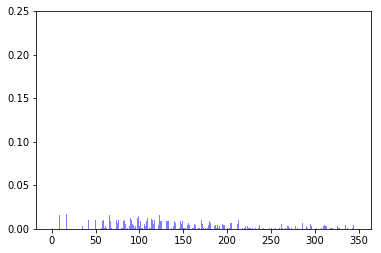

In [389]:
num_bins = 1000
n, bins, patches = plt.hist(Drug_use_dis_m, num_bins, normed=1, facecolor='blue', alpha=0.5)

In [387]:
Drug_use_dis_m = Drug_use_dis[0:2000]